# Multimodal AI exercise 1: Introduction into Python and PyTorch
Exercises will not be graded.

In [ ]:
!python -V

Python 3.10.12


## Very short introduction into Python
For more detailed Python explanations, we can recommend the [Python Programming Beginner Tutorials](https://www.youtube.com/playlist?list=PL-osiE80TeTskrapNbzXhwoFUiLCjGgY7) from Corey Schafer.

### Data structures in Python
Python includes serveral data structures: lists, dictionaries, sets, and tuples.

Here, we will briefly introduce lists and dictionaries

In [ ]:
########### Lists ###########
l = [1, 2, 3, 4, 5, 6, 7, 8]        # create a list
print(l)
print("element at index 3:", l[3])
print("element at list index:", l[-1])
print("first 3 elements:", l[:3])
print("elements between index 5 and 7:", l[5:7])  # start is inclusive : stop is exclusive
l.append(9)   # add an element at the end of the list
print(l)

[1, 2, 3, 4, 5, 6, 7, 8]
element at index 3: 4
element at list index: 8
first 3 elements: [1, 2, 3]
elements between index 5 and 7: [6, 7]
[1, 2, 3, 4, 5, 6, 7, 8, 9]


In [ ]:
####### Dictionaries ########
num_occurences = {"students": 80, "lecturers": 2}   # create a dictionary
print(num_occurences)
print("number of students:", num_occurences["students"])
num_occurences["assistants"] = 4                    # add a key-value pair
print("Number of assistants:", num_occurences.get("assistants", "N/A"))
print("number of unmotivated persons:", num_occurences.get("unmotivated", 0))

{'students': 80, 'lecturers': 2}
number of students: 80
Number of assistants: 4
number of unmotivated persons: 0


### Loops


In [ ]:
xs = [0, 1, 2, 3, 4]
times_two = []
for x in xs:
    times_two.append(x*2)
print("x:    ", xs)
print("x * 2:", times_two)

x:     [0, 1, 2, 3, 4]
x * 2: [0, 2, 4, 6, 8]


The same loop can be also done shorter using **list comprehension**:

In [ ]:
times_two = [x*2 for x in xs]
print(times_two)

[0, 2, 4, 6, 8]


You can also use conditions:

In [ ]:
xl = [x*3 for x in xs if x > 2]
print("elements larger than 2 multiplied by 3: ", xl)

elements larger than 2 multiplied by 3:  [9, 12]


Iteration through a **dictionary**:

In [ ]:
for key, val in num_occurences.items():
    print(f"{key}: {val}")

students: 80
lecturers: 2
assistants: 4


### Functions
Functions are defined via `def` and can have *optional* besides required arguments

In [ ]:
def wish_fun(name, w_smiley=False):
    wish = f"Have fun, {name}"
    if w_smiley:
        wish += " \U0001f600"
    return wish

print(wish_fun("Lukas"))
print(wish_fun("Anh", w_smiley=True))

Have fun, Lukas
Have fun, Anh 😀


### Classes
Classes are defined via `class` and are constructed via `__init__`

In [ ]:
class Student:
    def __init__(self, name):
        self.name = name
        self.mai_knowledge = False

    def visits_mai_lecture(self):
        self.mai_knowledge = True

    def get_mai_knowledge(self):
        return self.mai_knowledge

stud = Student("Jens")
print(f"{stud.name} has mai knowledge: {stud.get_mai_knowledge()}")
stud.visits_mai_lecture()
print("After visiting MAI lecture")
print(f"{stud.name} has mai knowledge: {stud.get_mai_knowledge()}")

Jens has mai knowledge: False
After visiting MAI lecture
Jens has mai knowledge: True


## Numpy
Numpy provides high-performance tools for multidimenional array objects

In [ ]:
import numpy as np

In [ ]:
# initialize an array of shape [2x2] with zeros
z = np.zeros((2,2))
print("zeros:\n", z)
# initialize an array with specific values
a = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9])
print("\na:\n", a)
print("Type:", type(a))
print("Type of numpy array:", a.dtype)
print("Shape:", a.shape)

zeros:
 [[0. 0.]
 [0. 0.]]

a:
 [1 2 3 4 5 6 7 8 9]
Type: <class 'numpy.ndarray'>
Type of numpy array: int64
Shape: (9,)


In [ ]:
a = a.reshape((3,3))
print(a)
print("Shape:", a.shape)

[[1 2 3]
 [4 5 6]
 [7 8 9]]
Shape: (3, 3)


#### Indexing of arrays

In [ ]:
print("element at row 0, column 1:", a[0,1])
print("second row:", a[1])
print("third column:", a[:,-1])

element at row 0, column 1: 2
second row: [4 5 6]
third column: [3 6 9]


Index via slicing

<font color='red'>Caution</font> : A slice is a **view** of the original array. Modifying the slice will **modify the original array**!

In [ ]:
b = a[1:, :]    # view to the last two rows of a
print(b)
b[1,0] = 77
print("b after modification")
print(b)
print("a after modification")
print(a)        # a is modified even though we never assigned the 77 directly to a

[[4 5 6]
 [7 8 9]]
b after modification
[[ 4  5  6]
 [77  8  9]]
a after modification
[[ 1  2  3]
 [ 4  5  6]
 [77  8  9]]


Use **copy** to get an independent subarray of a

In [ ]:
a = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9]).reshape((3,3))
b = np.copy(a[1:, :])
print(b)
b[1,0] = 77
print("b after modification")
print(b)
print("a is not modified when using np.copy()")
print(a)        # a is not modified

[[4 5 6]
 [7 8 9]]
b after modification
[[ 4  5  6]
 [77  8  9]]
a is not modified when using np.copy()
[[1 2 3]
 [4 5 6]
 [7 8 9]]


In [ ]:
row_idxs = [0,2]
col_idxs = [1,2]
print("access rows via list of indices")
print(a[row_idxs])
print("access columns via list of indices")
print(a[:, col_idxs])

access rows via list of indices
[[1 2 3]
 [7 8 9]]
access columns via list of indices
[[2 3]
 [5 6]
 [8 9]]


In [ ]:
# index array based on condition
print(a[a<5])

[1 2 3 4]


### Numpy math

In [ ]:
b = np.array([[0,0], [1,1], [2,2]])
c = b + 1
print("Matrix a:\n", a)
print("Matrix b:\n", b)
print("Matrix c:\n", c)

Matrix a:
 [[1 2 3]
 [4 5 6]
 [7 8 9]]
Matrix b:
 [[0 0]
 [1 1]
 [2 2]]
Matrix c:
 [[1 1]
 [2 2]
 [3 3]]


In [ ]:
print("element-wise sum")
print(b + c)
print(np.add(b, c))
print("element-wise product")
print(b * c)
print(np.multiply(b, c))

element-wise sum
[[1 1]
 [3 3]
 [5 5]]
[[1 1]
 [3 3]
 [5 5]]
element-wise product
[[0 0]
 [2 2]
 [6 6]]
[[0 0]
 [2 2]
 [6 6]]


In [ ]:
# matrix multiplication
c = c.T # transpose c; [3x2] => [2x3]
print("matrix multiplication")
print(b.dot(c))
print(np.dot(b, c))

matrix multiplication
[[ 0  0  0]
 [ 2  4  6]
 [ 4  8 12]]
[[ 0  0  0]
 [ 2  4  6]
 [ 4  8 12]]


In [ ]:
# many operations can be performed along specific dimensions
print(np.sum(a))
print(np.sum(a, axis=0))    # sum for each column
print(np.sum(a, axis=1))    # sum for each row

45
[12 15 18]
[ 6 15 24]


The full list of mathematical functions can be found in the [numpy documentation](https://numpy.org/doc/stable/reference/routines.math.html)

### Exercise
Implement the cosine similarity between two vectors with numpy (no other Python library)

$\cos(θ) =\frac{v1 \cdot v2}{||v1|| ||v2||}$

In [ ]:
vec1 = np.array([0.1, 0.2, 0.6, 0.1])
vec2 = np.array([0.2, 0.15, 0.55, 0.1])

def cos_sim(v1, v2):
    """ calculate the cosine similarity between the two input vectors
    args:
        v1: first 1D numpy vector
        v2: second 1D numpy vector
    return:
        cos sim as one number
    """
    # ToDo: Your code here
    return np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))

print(cos_sim(vec1, vec2))

0.9827076298239908


In [ ]:
# Test cell to verify your implementation, do not modify
from scipy import spatial

def check_correctness(test_num, v1, v2, threshold=1e-8):
    corr = 1 - spatial.distance.cosine(v1, v2)
    cand = 0 if cos_sim(v1, v2) is None else cos_sim(v1, v2)
    ret_str = f"Test {test_num}: "
    ret_str += "successful" if abs(corr - cand) < threshold else "failed"
    print(ret_str)

testv1 = [3, 45, 7, 2]
testv2 = [2, 54, 13, 15]
testv3 = [40, 3, 10, 8]
check_correctness(1, testv1, testv2)
check_correctness(2, testv1, testv3)
check_correctness(3, testv2, testv3)

Test 1: successful
Test 2: successful
Test 3: successful


## Matplotlib
Matplotlib is a powerful yet simple tool to create visualizations in Python

In [ ]:
import matplotlib.pyplot as plt

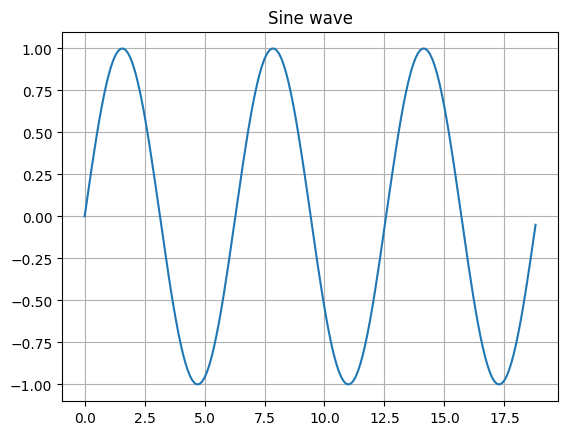

In [ ]:
# plotting the sine
t = np.arange(0, 6*np.pi, 0.1)
sine = np.sin(t)
plt.plot(t, sine)
plt.title("Sine wave")
plt.grid()
plt.show()
plt.close()

### Exercise
Plot the sine and cosine in one plot. Center the plot around 0 ([-3π, 3π]), only show the x label ticks at multiples of π, and add a legend to indicate which line is the sine and cosine.

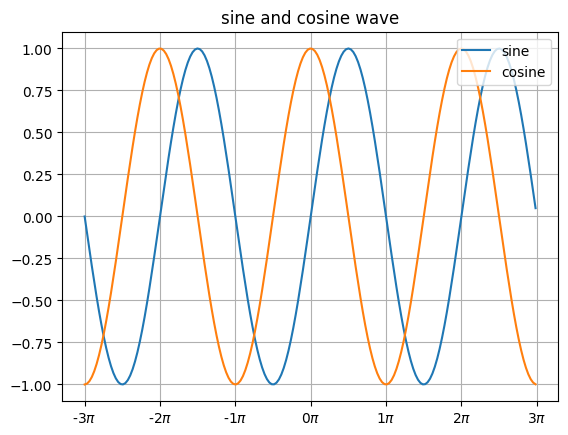

In [ ]:
def plot_sine_and_cosine():
    # x values from -3pi to 3pi
    t = np.arange(-3*np.pi, 3*np.pi, 0.1)
    # ticks in the same range but with a stepsize of pi
    pi_row = np.arange(-3*np.pi, 3*np.pi + 1, np.pi)
    # assign the name x*pi as string to each tick (it is a list of same size)
    pi_names = [str(i) + r"$\pi$" for i in range(-3, 4)]
    sine = np.sin(t)
    # calculate not only the sine but also the cosine
    cos = np.cos(t)
    # plot both waves
    plt.plot(t, sine, label="sine")
    plt.plot(t, cos, label="cosine")
    plt.title("sine and cosine wave")
    plt.grid()
    # set the ticks given in pi_names at the correct locations (multiples of pi)
    plt.xticks(pi_row, pi_names)
    # add a legend in the upper right corner
    plt.legend(loc="upper right")
    plt.show()
    plt.close()

plot_sine_and_cosine()

## PyTorch
PyTorch is a powerful machine learning library with strong computational acceleration via GPU support.

In [ ]:
!pip install torchinfo

In [ ]:
# import the pytorch library
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torchinfo import summary
from PIL import Image
# import matplotlib to do visualizations
import matplotlib.pyplot as plt
# import tqdm for nice progress bars for loops
from tqdm import tqdm
import numpy as np

# set a device
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print("device:", device)

### Dataset
In the following, we define the training and testing dataset and dataloader (validation is left out for simplicity). In this example we use CIFAR10 dataset provided by PyTorch and specify transformations of each image via `transform`. E.g, each image is transformed to a tensor (value range changes from [0, 255] to [0, 1]) and then normalized to the value range of [-1, 1].

In [ ]:
transform_train = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform_train)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ['plane', 'car', 'bird', 'cat', 'deer',
           'dog', 'frog', 'horse', 'ship', 'truck']

100%|██████████| 170498071/170498071 [00:12<00:00, 14072062.48it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


Next, we show some example images together with the corresponding class label.

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


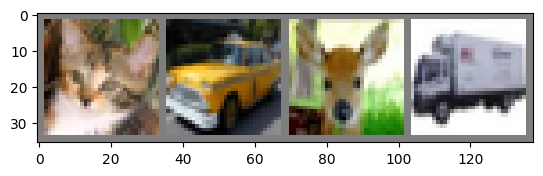

cat   car   deer  truck


In [ ]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

dataiter = iter(trainloader)
images, labels = next(dataiter)

imshow(torchvision.utils.make_grid(images))
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

### Model
Here, we define the network and transfer it to the GPU (if available)

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()
net.to(device)
summary(net, (4, 3, 32, 32))

Layer (type:depth-idx)                   Output Shape              Param #
Net                                      [4, 10]                   --
├─Conv2d: 1-1                            [4, 6, 28, 28]            456
├─MaxPool2d: 1-2                         [4, 6, 14, 14]            --
├─Conv2d: 1-3                            [4, 16, 10, 10]           2,416
├─MaxPool2d: 1-4                         [4, 16, 5, 5]             --
├─Linear: 1-5                            [4, 120]                  48,120
├─Linear: 1-6                            [4, 84]                   10,164
├─Linear: 1-7                            [4, 10]                   850
Total params: 62,006
Trainable params: 62,006
Non-trainable params: 0
Total mult-adds (M): 2.63
Input size (MB): 0.05
Forward/backward pass size (MB): 0.21
Params size (MB): 0.25
Estimated Total Size (MB): 0.51

### Optimization
We still need to define the loss function we want to optimize and specify an optimizer.

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

### Training Loop
After we have set all things up, we are ready to execute the training loop 🚀

In [ ]:
losses = []     # save loss values to plot them later
update_freq = 100
num_epochs = 2
net.train()

for epoch in range(num_epochs):  # loop over the dataset multiple times

    running_loss = 0.0
    pbar = tqdm(enumerate(trainloader), total=len(trainloader), desc="Training")
    for i, (imgs, labels) in pbar:
        # move the images and labels to the same device as the model (net)
        imgs, labels = imgs.to(device), labels.to(device)
        # zero the parameter gradients
        optimizer.zero_grad()
        # forward pass
        outputs = net(imgs)
        # calculate the loss
        loss = criterion(outputs, labels)
        # backpropagate the loss
        loss.backward()
        # do one optimizer step
        optimizer.step()

        # show statistics
        running_loss += loss.item()
        if i % update_freq == update_freq-1:    # update loss every update_freq mini-batches
            avg_loss = running_loss / update_freq
            pbar.set_postfix_str(f'loss: {avg_loss:.3f}')
            losses.append(avg_loss)
            running_loss = 0.0

print("\n Training finished")

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
Training: 100%|█████████▉| 12491/12500 [00:58<00:00, 228.31it/s, loss: 1.528]/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
Training: 100%|██████████| 12500/12500 [01:01<00:00, 203.30it/s, loss: 1.309]


 Training finished


### Evaluation
After we trained our model, it is time to see how it performs on our (held out) testing data

In [ ]:
correct = 0
total = 0
net.eval()

# we don't need gradient calculation for evaluation/inference, thus we omit them
with torch.no_grad():
    for data in tqdm(testloader):
        images, labels = data[0].to(device), data[1].to(device)
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest logit is choosen as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'\nAccuracy of the network on the {len(testset)} test images: {100 * correct // total} %')

100%|██████████| 2500/2500 [00:08<00:00, 288.65it/s]


Accuracy of the network on the 10000 test images: 54 %


### Exercise 1
Plot the loss curve for the list training losses

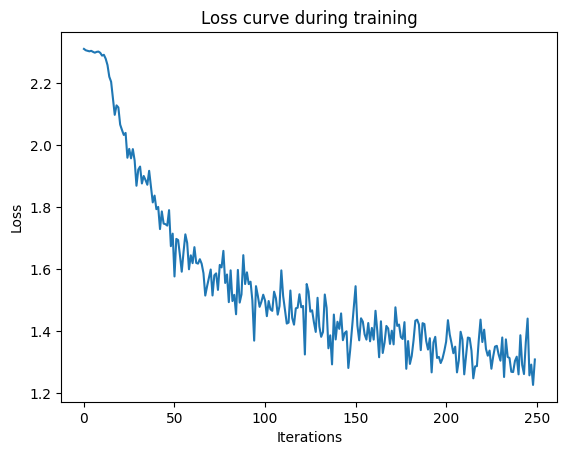

In [ ]:
def plot_loss_curve(loss_list):
    # ToDo: Your code here
    plt.plot(loss_list)
    plt.title("Loss curve during training")
    plt.xlabel("Iterations")
    plt.ylabel("Loss")
    plt.show()

plot_loss_curve(losses)

### Exercise 2
Do inference on the given image of the deer (its given the [GitHub repo](https://github.com/MKlmt/MAI_exercises_2024), just upload it to this colab notebook) and predict its label. Try out other images by yourself.

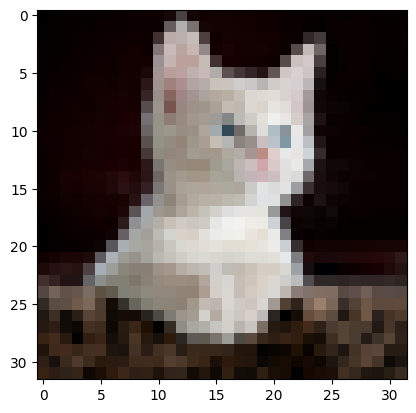

In [ ]:
import os
img_path = "cute_cat.jpg"

def resize2square(img, out_size=32):
    """ crops the square center of given image and
        resizes it to the desired output size
    args:
        img: input image as PIL.Image
        out_size: output size of the image as integer
    return:
        resized image in PIL.Image format
    """
    width, height = img.size
    length = min(width, height)
    left = (width - length) / 2
    top = (height - length) / 2
    right = (width + length) / 2
    bottom = (height + length) / 2
    img = img.crop((left, top, right, bottom))
    return img.resize((out_size, out_size))

if os.path.exists(img_path):
    infer_img = Image.open(img_path)
    infer_img = resize2square(infer_img)
    plt.imshow(infer_img)
    plt.show()
    plt.close()
else:
    print("I can't find the image. Upload it or modify img_path to point " +
          "to the location where you saved the image")

In [ ]:
# ToDo: Your code here
# Bring image into the model input format
infer_img = transform(infer_img)
infer_img = infer_img.unsqueeze(0)

# give the image to the model and predict its label
with torch.no_grad():
    img = infer_img.to(device)
    # calculate outputs by running images through the network
    outputs = net(img)
    # the class with the highest logit is choosen as prediction
    _, predicted = torch.max(outputs.data, 1)
print("Label:", classes[predicted[0]])

Label: dog


### Exercise 3
You have surely noticed the accuracy is around 50% which is better than a random performance of 10%. However, it is still not great. Can you think of ways how to improve the performance?
Feel free to implement them. Can you improve the model that it predicts the cute cat correctly? 😉

In [ ]:
# add some more augmentation during training
transform_train = transforms.Compose([
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomRotation(10),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])

# increase batch size to speed up training
batch_size = 64

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform_train)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ['plane', 'car', 'bird', 'cat', 'deer',
           'dog', 'frog', 'horse', 'ship', 'truck']

Files already downloaded and verified
Files already downloaded and verified


In [ ]:
# change convolution layers and add one more
# add dropout
class Net2(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 16, 3, padding=1)
        self.conv2 = nn.Conv2d(16, 32, 3, padding=1)
        self.conv3 = nn.Conv2d(32, 64, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 4 * 4, 512)
        self.dropout = nn.Dropout(0.5)
        self.fc2 = nn.Linear(512, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x


net2 = Net2()
net2.to(device)
summary(net2, (4, 3, 32, 32))

Layer (type:depth-idx)                   Output Shape              Param #
Net2                                     [4, 10]                   --
├─Conv2d: 1-1                            [4, 16, 32, 32]           448
├─MaxPool2d: 1-2                         [4, 16, 16, 16]           --
├─Conv2d: 1-3                            [4, 32, 16, 16]           4,640
├─MaxPool2d: 1-4                         [4, 32, 8, 8]             --
├─Conv2d: 1-5                            [4, 64, 8, 8]             18,496
├─MaxPool2d: 1-6                         [4, 64, 4, 4]             --
├─Linear: 1-7                            [4, 512]                  524,800
├─Dropout: 1-8                           [4, 512]                  --
├─Linear: 1-9                            [4, 10]                   5,130
Total params: 553,514
Trainable params: 553,514
Non-trainable params: 0
Total mult-adds (M): 13.44
Input size (MB): 0.05
Forward/backward pass size (MB): 0.93
Params size (MB): 2.21
Estimated Total Size (MB): 

In [ ]:
criterion = nn.CrossEntropyLoss()
# change optimizer to Adam
optimizer = torch.optim.Adam(net2.parameters(), lr = 0.001)

In [ ]:
losses = []
update_freq = 100
# train for longer
num_epochs = 15

for epoch in range(num_epochs):  # loop over the dataset multiple times

    running_loss = 0.0
    pbar = tqdm(enumerate(trainloader), total=len(trainloader), desc="Training")
    for i, (imgs, labels) in pbar:
        # move the images and labels to the same device as the model (net)
        imgs, labels = imgs.to(device), labels.to(device)
        # zero the parameter gradients
        optimizer.zero_grad()
        # forward pass
        outputs = net2(imgs)
        # calculate the loss
        loss = criterion(outputs, labels)
        # backpropagate the loss
        loss.backward()
        # do one optimizer step
        optimizer.step()

        # show statistics
        running_loss += loss.item()
        if i % update_freq == update_freq-1:    # update loss every update_freq mini-batches
            avg_loss = running_loss / update_freq
            pbar.set_postfix_str(f'loss: {avg_loss:.3f}')
            losses.append(avg_loss)
            running_loss = 0.0

print("\n Training finished")

Training: 100%|██████████| 782/782 [00:37<00:00, 21.02it/s, loss: 0.726]


 Training finished


In [ ]:
correct = 0
total = 0
# we don't need gradient calculation for evaluation/inference, thus we omit them
with torch.no_grad():
    for data in tqdm(testloader):
        images, labels = data[0].to(device), data[1].to(device)
        # calculate outputs by running images through the network
        outputs = net2(images)
        # the class with the highest logit is choosen as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'\nAccuracy of the network on the {len(testset)} test images: {100 * correct // total} %')

100%|██████████| 157/157 [00:03<00:00, 52.07it/s]


Accuracy of the network on the 10000 test images: 73 %


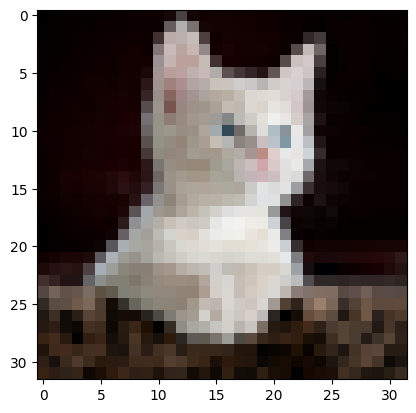

Label: cat


In [ ]:
img_path = "cute_cat.jpg"
infer_img = Image.open(img_path)
infer_img = resize2square(infer_img)
plt.imshow(infer_img)
plt.show()
plt.close()

infer_img = transform(infer_img)
infer_img = infer_img.unsqueeze(0)
# give the image to the model and predict its label
with torch.no_grad():
    img = infer_img.to(device)
    # calculate outputs by running images through the network
    outputs = net2(img)
    # the class with the highest logit is choosen as prediction
    _, predicted = torch.max(outputs.data, 1)
print("Label:", classes[predicted[0]])